In [2]:
import numpy as np
import scipy as sp
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

In [76]:
PATH = '../voronoi/2K'
VERTEX_PATH = PATH + '/vertices.txt'
RIDGES_PATH = PATH + '/ridges.txt'

In [77]:
ridges = np.loadtxt(RIDGES_PATH, dtype = int)
vertices = np.loadtxt(VERTEX_PATH)

In [78]:
def plot_grains(vertices, ridges, figsize=(10,7), vertex_plot = True, vertex_size = 3):
    plt.figure(figsize=figsize)
    vertex_number = vertices.shape[0]
    # Mark the Voronoi vertices.
    if vertex_plot:
        plt.plot(vertices[:,0], vertices[:, 1], "ko", ms=vertex_size)
    # Quadrants for periodic boundary collection
    quadrants = np.concatenate((
                                        vertices,
                                        vertices + [-1., 1.],
                                        vertices + [0., 1.],
                                        vertices + [1., 1.],
                                        vertices + [-1., 0.],
                                        vertices + [1., 0.],
                                        vertices + [-1., -1.],
                                        vertices + [0., -1.],
                                        vertices + [1., -1.]
                                        ), axis=0)
    for vpair in ridges:
        v0 = vertices[vpair[0]]
        v1 = vertices[vpair[1]]
        if np.linalg.norm(v1-v0) < 0.5:   
            # Draw a line from v0 to v1.
            plt.plot([v0[0], v1[0]], [v0[1], v1[1]], 'k', linewidth=0.5)
        else:
            min_v0 = (np.infty,-1)
            min_v1 = (np.infty,-1)
            for i in range(vertex_number, quadrants.shape[0], vertex_number):
                norm_v0 = np.linalg.norm(quadrants[i + vpair[1]] - v0)
                norm_v1 = np.linalg.norm(quadrants[i + vpair[0]] - v1)
                if norm_v0 < min_v0[0]:
                    min_v0 = (norm_v0, i)
                if norm_v1 < min_v1[0]:
                    min_v1 = (norm_v1, i)
            plt.plot([v0[0], quadrants[min_v0[1] + vpair[1]][0]], [v0[1], quadrants[min_v0[1] + vpair[1]][1]], 'k', linewidth=0.5)
            plt.plot([v1[0], quadrants[min_v1[1] + vpair[0]][0]], [v1[1], quadrants[min_v1[1] + vpair[0]][1]], 'k', linewidth=0.5)
    plt.xlim(0., 1.)
    plt.ylim(0., 1.)
    plt.show()

In [35]:
def move_vertex(vertices, vertex_n, direction, distance):
    x_mov = np.cos(direction) * distance
    y_mov = np.sin(direction) * distance
    vertices[vertex_n][0] += x_mov
    vertices[vertex_n][1] += y_mov

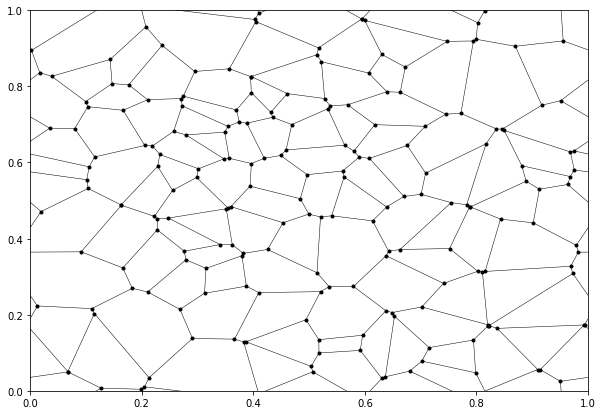

In [79]:
plot_grains(vertices, ridges)

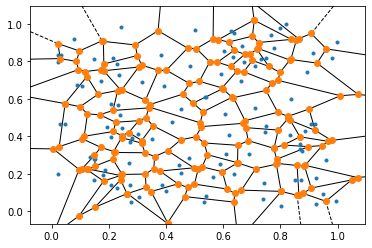

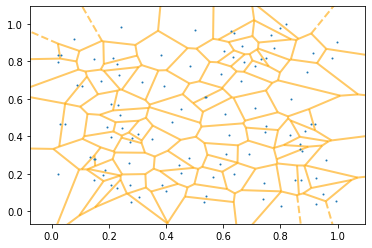

In [53]:
rng = np.random.default_rng()
points = rng.random((100,2))
vor = Voronoi(points)
fig = voronoi_plot_2d(vor)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
                line_width=2, line_alpha=0.6, point_size=2)
plt.show()
# & "C:/Users/Cristóbal Abarca/AppData/Local/Programs/Python/Python39/python.exe" e:/U/MEMORIA/thesis_code/memo/voronoi/voronoi.py 3 0 ./voronoi/2K/vertices.txt ./voronoi/2K/ridges.txt ./voronoi/2K/oris.txt ./voronoi/2K/SE/uniform.txt  